<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4998 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3736 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3137 - accuracy: 0.8839
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3836 - accuracy: 0.8625


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [5]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.14.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)       

It's likely gone up to about 93% on the training data and 91% on the validation data.

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later.

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Add another convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```


The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 21ms/step


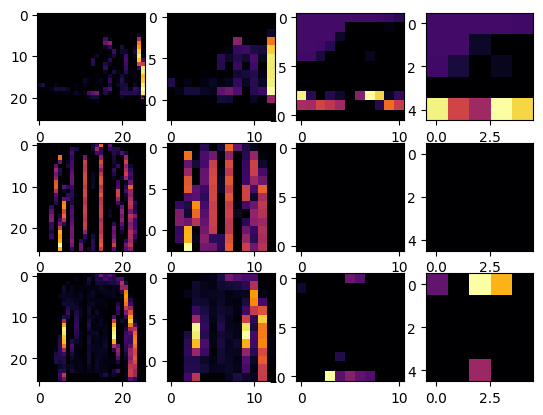

In [7]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [8]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.14.0
11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1528 - accuracy: 0.9545
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0517 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0147 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0110 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0067 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0065 - accuracy:

1. Change the convolutional layer configurations: change the number of filters in the convolutional layers to 16 and 64.

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

The impact will likely be a reduction in the number of parameters (and hence training time) but a potential decrease in accuracy compared to the original model. Smaller filter sizes generally capture fewer features, while larger filter sizes can capture more complex features.

Changing the number of filters in the convolutional layers, as demonstrated in the modified code with 16 and 64 filters, has a significant impact on both accuracy and training time. The reduction in the number of filters from the original 32 to 16 may lead to a potential decrease in accuracy, as the model may struggle to capture and learn intricate features and patterns within the data. This reduction in the model's capacity to represent complex information may result in lower accuracy on both the training and validation datasets. On the other hand, training time is expected to improve with fewer filters, as there are fewer computations involved in each forward and backward pass. This implies that each training epoch is likely to complete more quickly. However, it's essential to strike a balance between training time and accuracy, as the pursuit of faster training may come at the expense of model performance. Ultimately, the choice of the number of filters should be determined through experimentation and validation dataset evaluation, as it is influenced by the specific dataset and problem at hand.

2. Remove the final Convolutional Layer:

Removing the final convolutional layer will reduce the depth of the network, potentially making it faster to train. It may also reduce the model's ability to capture complex patterns and could result in slightly lower accuracy.

In [10]:
# Question 2: Removing the final Convolutional Layer
print("\nQuestion 2: Removing the final Convolutional Layer")

# Remove the final convolutional layer.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Question 2: Removing the final Convolutional Layer
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 10816)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1384576   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)



Removing the final convolutional layer from the model leads to a trade-off between accuracy and training time.

Accuracy tends to decrease as the model's ability to capture intricate features is compromised, resulting in potential lower performance on both training and validation datasets. However, training time becomes more efficient due to the reduced computational complexity.

 The impact of this change should be considered in the context of the specific dataset and problem, and it's recommended to experiment and validate the model's performance to make an informed decision on whether the accuracy sacrifice is acceptable for faster training.

In [11]:
# Question 3: Adding more Convolutional Layers
print("\nQuestion 3: Adding more Convolutional Layers")

# Add more convolutional layers.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()


Question 3: Adding more Convolutional Layers
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_poo

Adding more convolutional layers may increase the capacity of the model to learn intricate features and patterns, but it might also increase training time.

Adding more convolutional layers can have both positive and negative impacts on model performance.

On the positive side, additional layers enhance the model's ability to capture intricate features, potentially boosting accuracy, especially for complex datasets. However, this comes at the cost of increased computational complexity, leading to longer training times and a risk of overfitting, where the model may not generalize well.

Experimentation and validation on the specific dataset are essential to find the right balance between depth and efficiency. The optimal number of convolutional layers varies by the problem and dataset, so monitoring both training and validation performance is crucial.

4. Remove all Convolutions but the first:

In [12]:
# Question 4: Removing all Convolutions but the first
print("\nQuestion 4: Removing all Convolutions but the first")

# Keep only the first convolutional layer.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the output for Question 4
model.summary()


Question 4: Removing all Convolutions but the first
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1384576   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)

This will significantly reduce the model's capacity to learn complex features. Training time may also decrease, but accuracy could be negatively impacted.

Removing all convolutions except the first simplifies the model but sacrifices its ability to extract intricate features. The impact:

1. **Simpler Model:** The model is less capable of capturing complex patterns.

2. **Faster Training:** Shorter training time due to fewer parameters.

3. **Reduced Expressiveness:** Loss of the ability to recognize intricate patterns may lead to lower accuracy, especially on complex datasets.

The effect on accuracy and training time depends on the dataset complexity and desired model efficiency.

In [13]:
# Question 5: Implementing a callback to check loss and stop training
print("\nQuestion 5: Implementing a callback to check loss and stop training")

# Define a custom callback to monitor the loss.
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.1:
            print("\nLoss is below 0.1. Stopping training.")
            self.model.stop_training = True


custom_callback = CustomCallback()

# Compile the model and fit it with the custom callback.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[custom_callback])

print("Training completed or stopped.")



Question 5: Implementing a callback to check loss and stop training
Epoch 1/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1342 - accuracy: 0.9599
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9853
Loss is below 0.1. Stopping training.
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0466 - accuracy: 0.9853
Training completed or stopped.


The training will stop if the loss goes below 0.1. The implemented a custom callback named CustomCallback to monitor the loss during the training process of a neural network model. This callback is designed to assess the loss at the end of each training epoch and take action if the loss falls below a pre-defined threshold, which, in this case, is set to 0.1. If the condition is met, the callback prints a message indicating that the loss is below the threshold and then proceeds to stop the training process by setting self.model.stop_training to True. An instance of the custom callback, custom_callback, is created and incorporated into the training process by adding it to the callbacks parameter when fitting the model. During the training phase, the model goes through multiple epochs, and if the loss falls below the specified threshold, the callback intervenes, effectively halting further training. Once the training process is completed or stopped, a final message is printed, indicating that the training has either finished or been terminated. This implementation of a custom callback empowers the user to closely monitor the loss and enact specific actions, such as early stopping, which can be beneficial for optimizing model training.